In [2]:
import numpy as np
import scipy
import scipy.optimize
import functools

In [41]:
def cfd(x, a=5, b=2):
    f = a*x**3 - b*x
    g1 = np.exp(-x)
    g2 = np.sin(4*np.pi * x)

    return np.hstack((f, g1, g2))


class Functions:

    def __init__(self, cfd_cb, M):
        #self.costFunction = None
        #self.constraints = []
        self.cfd_cb = cfd_cb
        self.M = M
        self.cfd_result = None
        self.cfd_updated = False
        self.last_x = None

    def check_if_updated(self, x):
        if self.last_x == x:
            self.cfd_updated = True
        else:
            self.cfd_updated = False
        
        return self.cfd_updated
    
    def calculate(self, x):        
        self.cfd_result = self.cfd_cb(x)
        self.cfd_updated = True
        self.last_x = x
    
    def costFunction(self, x):
        self.check_if_updated(x)
        if self.cfd_updated == False:
            self.calculate(x)
        
        return self.cfd_result[0]
    
    def constraintFunction(self, x, i):
        if i >= self.M:
            raise IndexError    

        self.check_if_updated(x)
        if self.cfd_updated == False:
            self.calculate(x)
        
        return self.cfd_result[i+1]



#func = Functions(cfd, 2)
cfd_with_params = functools.partial(cfd, a=3, b=2)
func = Functions(cfd_with_params, 2)

#cfd()
#cfd

xbounds = [[0, 1]]
gbounds = [[-1, 1], [0, 0.75]]

# f = lambda x: 5*x**2
# g1 = lambda x: np.exp(-x)

#func.costFunction = f
#func.constraints.append(g1)
#g_list = [g1, g2]
nlc_list = []

for i in range(func.M):
    nlc_list.append(
        scipy.optimize.NonlinearConstraint(
            functools.partial(func.constraintFunction, i=i), gbounds[i][0], gbounds[i][1]
        )
    )

res = scipy.optimize.differential_evolution(func.costFunction, constraints=nlc_list, bounds=xbounds)
res


           constr: [array([0.]), array([0.])]
 constr_violation: 0.0
              fun: -0.6249600882254682
              jac: [array([[-0.60643411]]), array([[12.56634546]]), array([[1.]])]
            maxcv: 0.0
          message: 'Optimization terminated successfully.'
             nfev: 79
              nit: 10
          success: True
                x: array([0.50015919])

In [19]:
cfd(res.x)

array([-0.09690399,  0.95242731,  0.57491772])

In [40]:
func.last_x, func.cfd_result

(None, array([-0.42171245,  0.77891988,  0.0019215 ]))

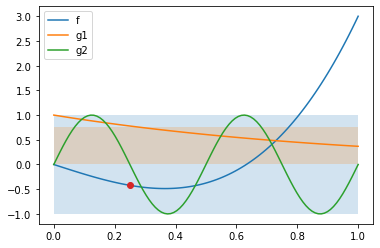

In [38]:
import matplotlib.pyplot as plt

x = np.linspace(xbounds[0][0], xbounds[0][1], 100)
y = cfd(x)
y = y.reshape((3, 100))

plt.plot(x, y[0], label="f")
plt.plot(x, y[1], label="g1")
plt.fill_between(x, gbounds[0][0], gbounds[0][1], alpha=0.2)
plt.plot(x, y[2], label="g2")
plt.fill_between(x, gbounds[1][0], gbounds[1][1], alpha=0.2)
plt.plot([res.x], [cfd(res.x)[0]], "o")
plt.legend()

In [21]:
y.shape

(300,)